In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem.Draw import IPythonConsole

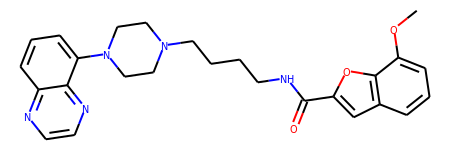

In [4]:
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
mol

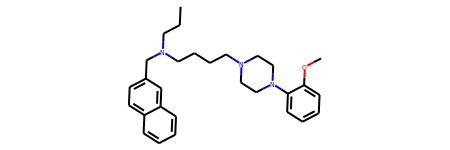

In [5]:
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')
refmol

In [7]:
fp = SimilarityMaps.GetAPFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetTTFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetMorganFingerprint(mol, fpType='bv')

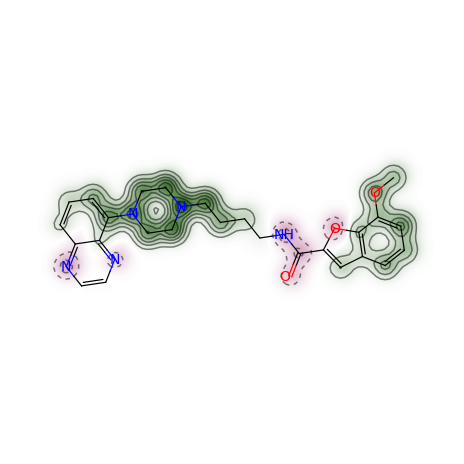

In [13]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)

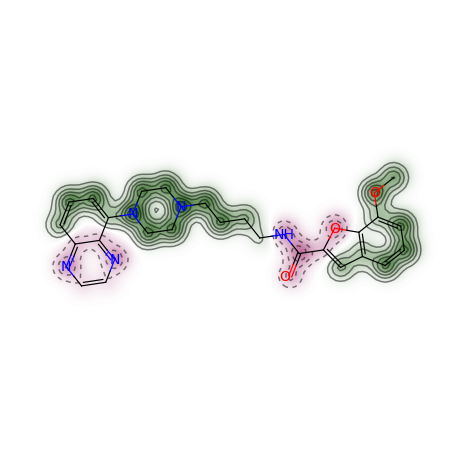

In [14]:
from rdkit import DataStructs
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, lambda m,idx: SimilarityMaps.GetMorganFingerprint(m, atomId=idx, radius=1, fpType='count'), metric=DataStructs.TanimotoSimilarity)

In [15]:
print(maxweight)

0.05747126436781608


In [17]:
weights = SimilarityMaps.GetAtomicWeightsForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)
print(["%.2f " % w for w in weights])

['0.05 ', '0.07 ', '0.05 ', '0.08 ', '0.05 ', '0.06 ', '0.03 ', '0.04 ', '-0.01 ', '-0.04 ', '-0.03 ', '-0.05 ', '0.01 ', '0.03 ', '0.07 ', '0.10 ', '0.12 ', '0.11 ', '0.09 ', '0.10 ', '0.09 ', '0.06 ', '0.03 ', '0.02 ', '-0.01 ', '-0.05 ', '0.00 ', '0.00 ', '-0.03 ', '0.02 ', '0.09 ', '0.11 ', '-0.04 ', '0.04 ']


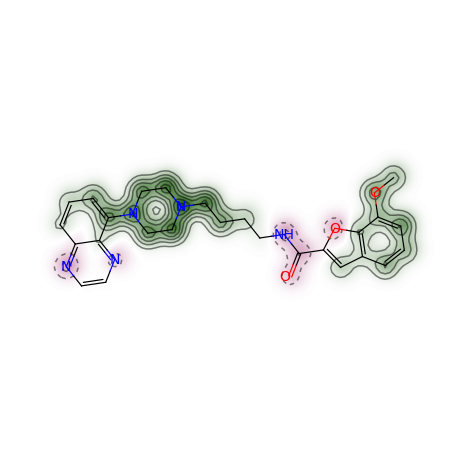

In [18]:
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, weights)